In [2]:
import numpy as np
import pandas as pd
import glob, os
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler


from skimage import transform as tf
from skimage import data
from skimage import io

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

from skimage import  io

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from skimage import io
from skimage import transform as tf
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd

%matplotlib inline


In [3]:

files = glob.glob("./*.txt")
L = []
names =[]
for i in range(len(files)):
    x = np.loadtxt(files[i]).flatten()
    names.append(files[i].strip('./txt '))
    output = np.hstack(x)
    L.append(output)
    output = np.array(L)
    df = pd.DataFrame(output,index=names)
    
columns = pd.MultiIndex.from_product([['Right eye', ' Left eye ', '  Nose ','Right side mouth   ' , 'Left side mouth']
                                      , ['X', 'Y']],
names=['Feature', 'Position '])

df.columns=columns
df = df.sort_index()

[  83.  129.  157.  128.  123.  162.   98.  204.  151.  198.]


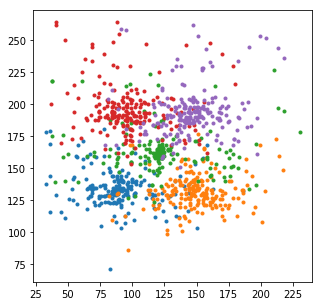

In [4]:
plt.figure(figsize=(5,5))
plt.plot(output[:,0::2],output[:,1::2],'.');
print(x)

In [5]:
files = glob.glob("./*.txt")
Imgfiles = glob.glob("./*.jpg")
L = []
names =[]
for i in range(len(files)):
    x = np.loadtxt(files[i]).flatten()
  #  Img = io.imread(Imgfiles[10])
    names.append(files[i].strip('./txt '))
    output = np.hstack(x)
    #print(output)
#     L.append(output)
#     output = np.array(L)    
#output.reshape(200,5,2)
Imgfiles.sort

<function list.sort>

In [13]:
Imgfiles = sorted(glob.glob("./*.jpg"))
files = sorted(glob.glob("./*.txt"))
src =  np.array([[13, 20], [50, 20], [34, 34], [16, 50], [48, 50]])
for i in range(len(Imgfiles)):
    img = GetImg(Imgfiles[i])
    x = np.loadtxt(files[i]).flatten()
    x = x.reshape(5,2) 
    para = TransForm(src,x)  
    warped = tf.warp( img, para, output_shape=(64,64))
    io.imsave('warped/{}.jpg'.format(Imgfiles[i].strip('./jpg ')),warped)




TypeError: 'bool' object is not callable

In [10]:
def GetImg(file):
    img = io.imread(file)
    return img
def TransForm(src,dst):
    tform3 = tf.AffineTransform()
    return tform3.estimate(src, dst)

In [ ]:
def flatten(img):
    out=io.imread(img).flatten()
    return out

images = io.ImageCollection('warped/*.jpg',load_func=flatten)
stack = io.concatenate_images(images)


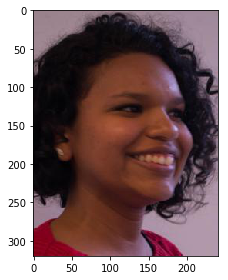

[  85.315   86.615   87.13  ...,  102.455  103.065  103.505]
(4096, 4096)


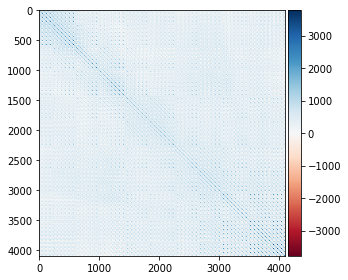

In [110]:

mean_vec = np.mean(stack,axis=0)
print(mean_vec)
cov_mat = (stack - mean_vec).T.dot((stack - mean_vec)) / (stack.shape[0]-1)
print(cov_mat.shape)
io.imshow(cov_mat)



/home/eljazri/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning:

Float image out of standard range; displaying image with stretched contrast.



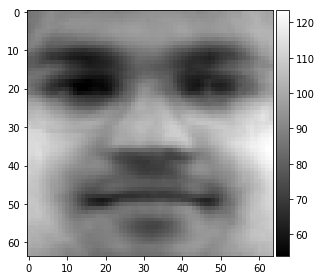

In [101]:
mean_Face = mean_vec.reshape(64,64) ;
io.imshow(mean_Face,cmap='gray')

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -1.50963358e-02 +0.00000000e+00j   9.79594321e-03 +0.00000000e+00j
   -1.46457663e-02 +0.00000000e+00j ...,  -2.19632751e-04 -2.54117057e-04j
   -2.19632751e-04 +2.54117057e-04j   5.91330071e-04 +0.00000000e+00j]
 [ -1.44863849e-02 +0.00000000e+00j   9.26040749e-03 +0.00000000e+00j
   -1.55165472e-02 +0.00000000e+00j ...,   3.89034682e-05 +4.36890813e-05j
    3.89034682e-05 -4.36890813e-05j   1.12882099e-04 +0.00000000e+00j]
 [ -1.40058516e-02 +0.00000000e+00j   8.40176364e-03 +0.00000000e+00j
   -1.37307005e-02 +0.00000000e+00j ...,  -1.30743073e-04 +4.87224831e-05j
   -1.30743073e-04 -4.87224831e-05j  -1.14808307e-04 +0.00000000e+00j]
 ..., 
 [ -1.24683635e-02 +0.00000000e+00j  -2.37426750e-02 +0.00000000e+00j
    2.07678181e-02 +0.00000000e+00j ...,   7.50128912e-03 +6.48844314e-03j
    7.50128912e-03 -6.48844314e-03j  -2.66412878e-03 +0.00000000e+00j]
 [ -1.36389068e-02 +0.00000000e+00j  -2.46584853e-02 +0.00000000e+00j
    2.10385810e-02 +0.00000000e+00j ...,   1.

In [88]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# # Sort the (eigenvalue, eigenvector) tuples from high to low

def getKey(item):
    return item[0]
eig_pairs = sorted(eig_pairs, key=getKey,reverse=True) 
eig_pairs = eig_pairs[0:100]
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])


In [70]:
L=[]
for i in eig_pairs:
    L.append(i[1])

In [71]:
EigVecs = np.array(L)

In [163]:
Feature = []

for i in range(len(images)):
    Feature.append(images[i].dot(np.real(EigVecs).T));
    

In [164]:
Feature = np.array(Feature)
Feature.shape

(200, 100)

In [153]:
Phi = images[0].dot(EigVecs.T);

In [ ]:
u,s,v = np.linalg.svd(cov_mat)


In [222]:
ImageTest1 = images[].dot(np.real(EigVecs).T);

In [223]:
ImageTest1.shape


(100,)

In [224]:
from numpy.linalg import norm
a = norm(Feature-ImageTest1, axis=1, ord=2) 

In [225]:
Pos = np.where(a == a.min())
Pos = np.array(Pos)

In [226]:
print(Pos.item())

0


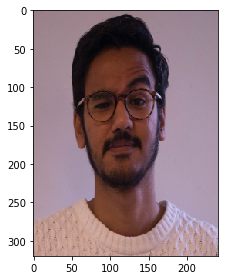

In [243]:
S = sorted(Imgfiles)
io.imshow(S[Pos.item()])


FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))